# Advertisement Success Dataset

## Task
This is a binary classification problem where you need to predict whether an ad will lead to a netgain

Loading the Nesscary libraries required

In [1]:
from sklearn.metrics import make_scorer, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy.stats import norm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the train and test data-set using pandas.read_csv



In [3]:
df_train=pd.read_csv('C:/Users/hitech services/Downloads/advertsuccess/Train.csv')
df_test=pd.read_csv('C:/Users/hitech services/Downloads/advertsuccess/Test.csv')

# Data Description:
Train.csv : 26049 x 12 [including headers] : training data set

Test.csv : 6514 x 11 [including headers] : test data set

# Data

Data Description

id                                 -Unique id for each row

ratings                            -Metric out of 1 which represents how much of the targeted demographic watched the advertisement

airlocation                        -Country of origin

airtime                            -Time when the advertisement was aired

average_runtime(minutes_per_week)  -Minutes per week the advertisement was aired

targeted_sex                       -Sex that was mainly targeted for the advertisement

genre                              -The type of advertisement

industry                           -The industry to which the product belonged

economic_status                    -The economic health during which the show aired

relationship_status                -The relationship status of the most responsive customers to the advertisement

expensive                          -A general measure of how expensive the product or service is that the ad is discussing.

money_back_guarantee               -Whether or not the product offers a refund in the case of customer dissatisfaction.

netgain [target]                   -Whether the ad will incur a gain or loss when sold

In [93]:
df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [94]:
#function for missing data
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))

In [95]:
missing_data(df_train)

,Total,Percent
netgain,0,0.0
money_back_guarantee,0,0.0
expensive,0,0.0
ratings,0,0.0
airlocation,0,0.0
airtime,0,0.0
average_runtime(minutes_per_week),0,0.0
targeted_sex,0,0.0
genre,0,0.0
industry,0,0.0


In [96]:
df_train.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [97]:
df_train.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object

In [98]:
df_train['netgain']=df_train['netgain'].astype('str')

In [99]:
df_train.netgain[df_train.netgain == 'True'] = 1
df_train.netgain[df_train.netgain == 'False'] = 0

In [100]:
df_train['netgain']=df_train['netgain'].astype('int')

In [101]:
df_train=df_train[df_train.airlocation != 'Holand-Netherlands']

In [102]:
df_train.airlocation.value_counts()

United-States                 23250
Mexico                          523
International                   465
Philippines                     141
Germany                         114
Canada                           94
Cuba                             86
Puerto-Rico                      85
El-Salvador                      84
India                            81
England                          79
Italy                            70
South                            69
Poland                           66
Jamaica                          63
Dominican-Republic               62
Guatemala                        61
Vietnam                          57
Columbia                         55
Japan                            54
China                            53
Taiwan                           37
Iran                             36
Haiti                            35
Ecuador                          31
Portugal                         30
Peru                             28
Nicaragua                   

# Correlation
When two sets of data are strongly linked together we say they have a High Correlation.

The word Correlation is made of Co- (meaning "together"), and Relation

Correlation is Positive when the values increase together, and
Correlation is Negative when one value decreases as the other increases
A correlation is assumed to be linear (following a line).

correlation examples
Correlation can have a value:

1 is a perfect positive correlation
0 is no correlation (the values don't seem linked at all)
-1 is a perfect negative correlation
The value shows how good the correlation is (not how steep the line is), and if it is positive or negative.

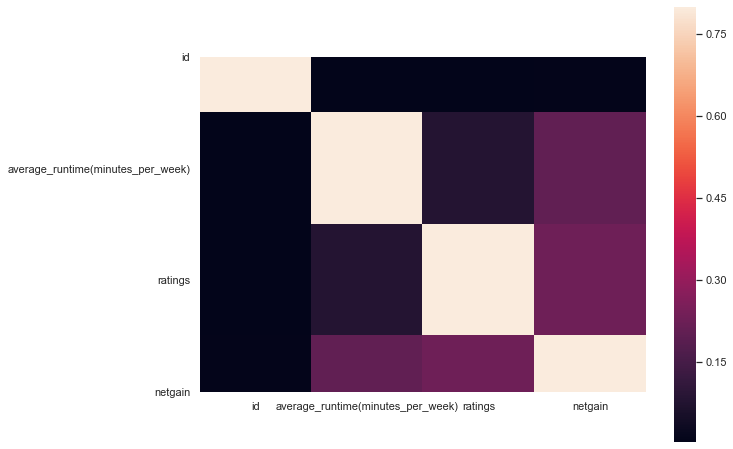

In [103]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

# Data Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization

<Figure size 1800x1440 with 0 Axes>

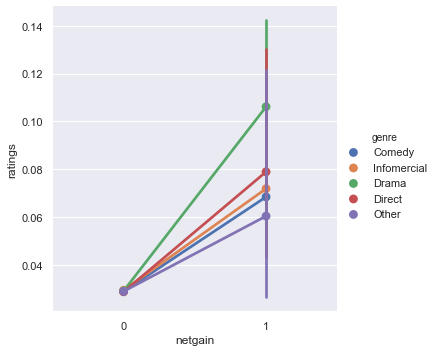

In [104]:
plt.figure(figsize=(25,20))
sns.factorplot(data=df_train,x='netgain',y='ratings',hue='genre')

Text(0.5, 1, 'boxplot')

<Figure size 1080x720 with 0 Axes>

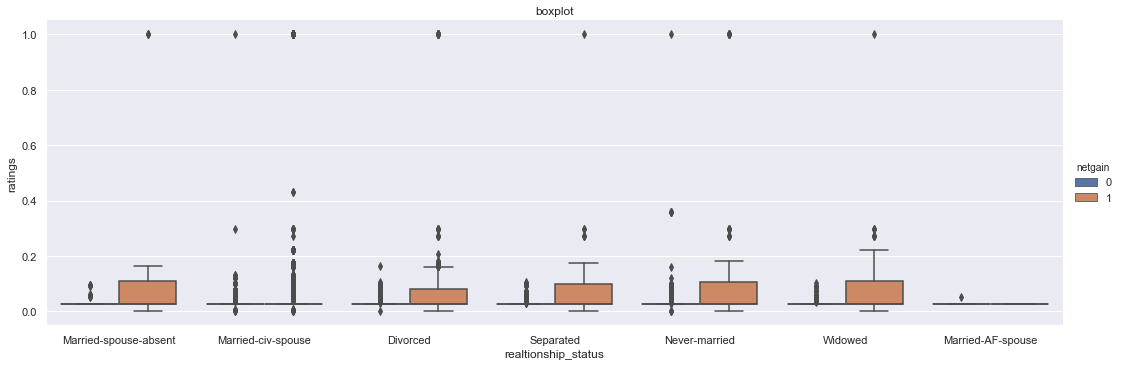

In [105]:
plt.figure(figsize=(15,10))
sns.catplot(x='realtionship_status',y='ratings',data=df_train,hue='netgain',height=5,aspect=3,kind='box')
plt.title('boxplot')

<Figure size 1080x720 with 0 Axes>

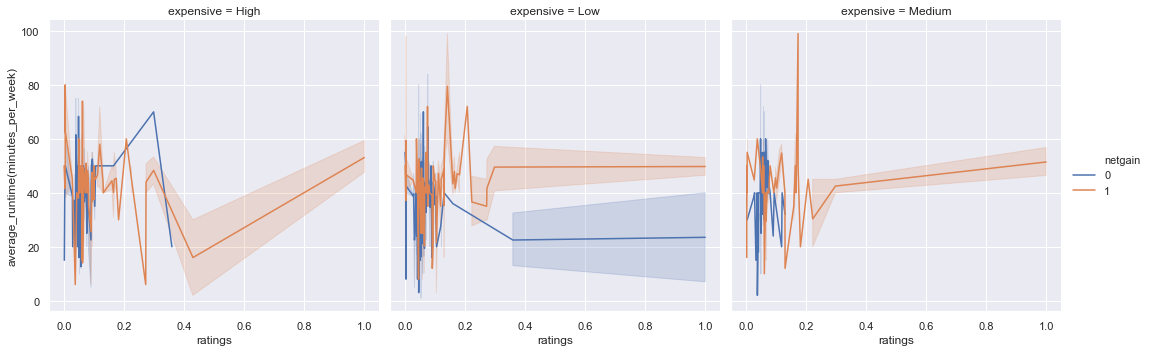

In [106]:
plt.figure(figsize=(15,10))
sns.relplot(x='ratings', y='average_runtime(minutes_per_week)', data=df_train,
            kind='line', hue='netgain', col='expensive')

<Figure size 1080x1080 with 0 Axes>

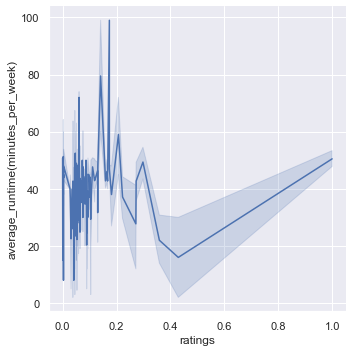

In [107]:
plt.figure(figsize=(15,15))
sns.relplot(x='ratings', y='average_runtime(minutes_per_week)', data=df_train,
            kind='line')

<Figure size 1080x720 with 0 Axes>

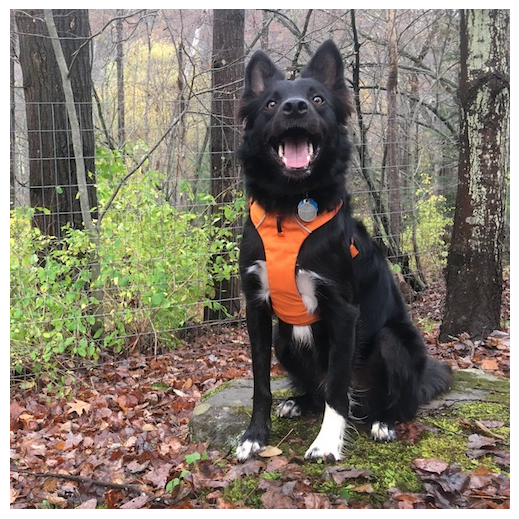

In [108]:
plt.figure(figsize=(15,10))
sns.dogplot()

<Figure size 720x720 with 0 Axes>

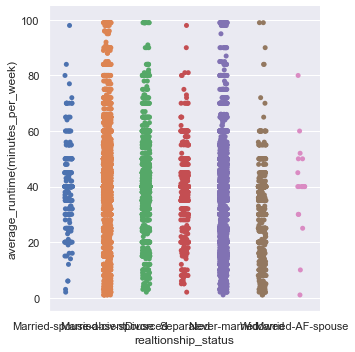

In [109]:
plt.figure(figsize=(10,10))
sns.catplot(x='realtionship_status',y='average_runtime(minutes_per_week)',data=df_train)

<Figure size 720x720 with 0 Axes>

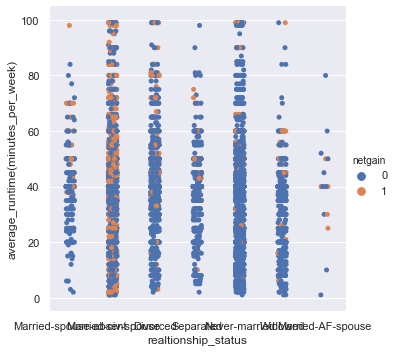

In [110]:
plt.figure(figsize=(10,10))
sns.catplot(x='realtionship_status',y='average_runtime(minutes_per_week)',hue='netgain',data=df_train)

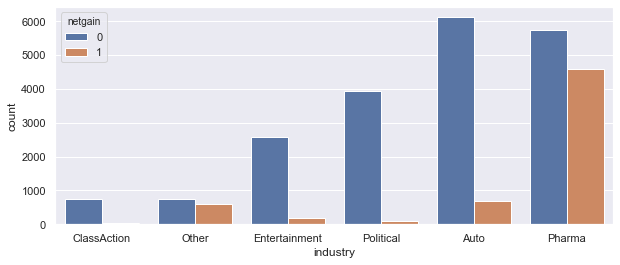

In [111]:
plt.figure(figsize=(10,4))
sns.countplot(x='industry',hue='netgain',data=df_train,order=df_train['industry'].value_counts().sort_values().index);

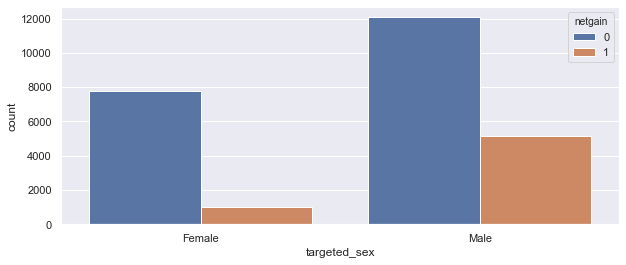

In [112]:
plt.figure(figsize=(10,4))
sns.countplot(x='targeted_sex',data=df_train,order=df_train['targeted_sex'].value_counts().sort_values().index,hue=df_train.netgain);

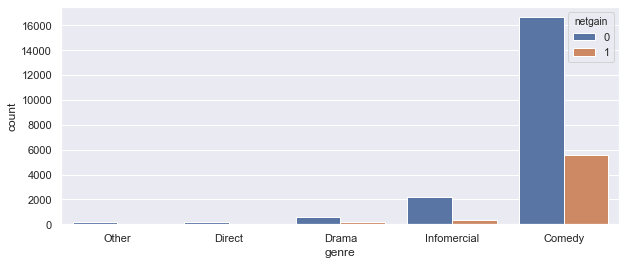

In [113]:
plt.figure(figsize=(10,4))
sns.countplot(x='genre',hue='netgain',data=df_train,order=df_train['genre'].value_counts().sort_values().index);

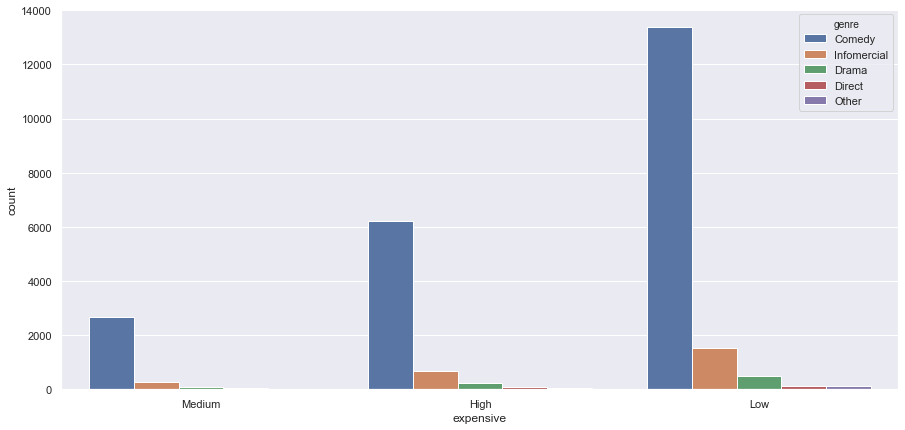

In [114]:
plt.figure(figsize=(15,7))
sns.countplot(x='expensive',hue='genre',data=df_train,order=df_train['expensive'].value_counts().sort_values().index);

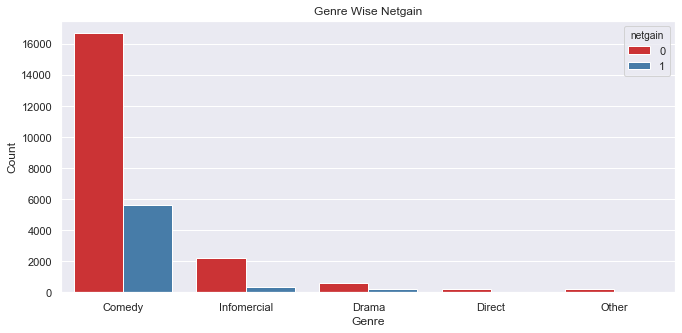

In [115]:
plt.figure(figsize=(11,5))
sns.countplot(x='genre',hue='netgain', data=df_train,palette="Set1")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Wise Netgain')
plt.show()

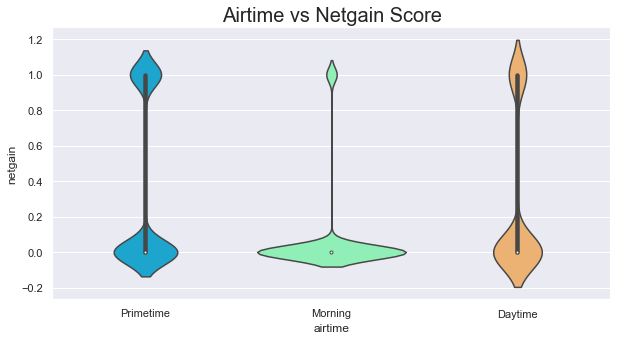

In [116]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df_train['airtime'], df_train['netgain'], palette = 'rainbow')
plt.title('Airtime vs Netgain Score', fontsize = 20)
plt.show()

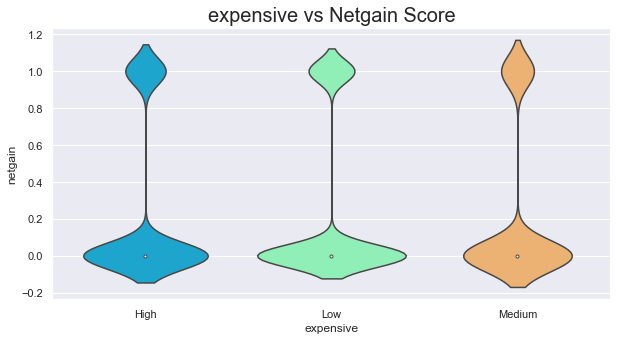

In [117]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df_train['expensive'], df_train['netgain'], palette = 'rainbow')
plt.title('expensive vs Netgain Score', fontsize = 20)
plt.show()

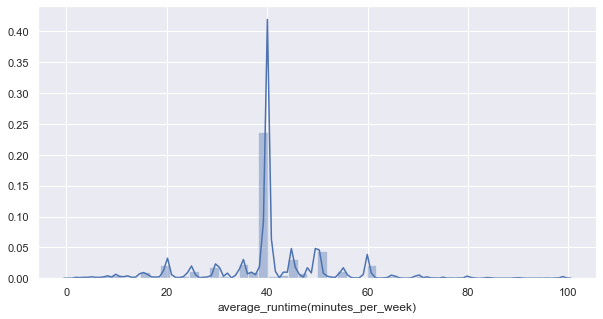

In [118]:
plt.figure(figsize=(10,5))
sns.distplot(df_train['average_runtime(minutes_per_week)'])
plt.show()

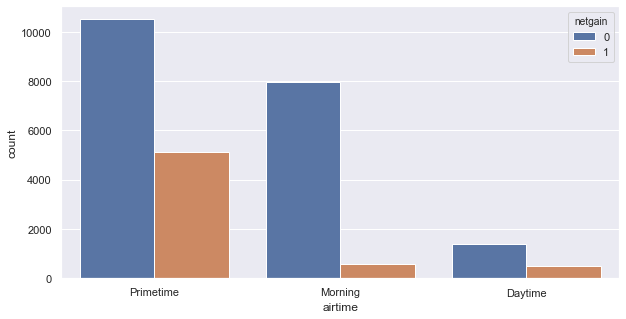

In [119]:
sns.countplot(df_train.airtime,hue=df_train.netgain)

In [120]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

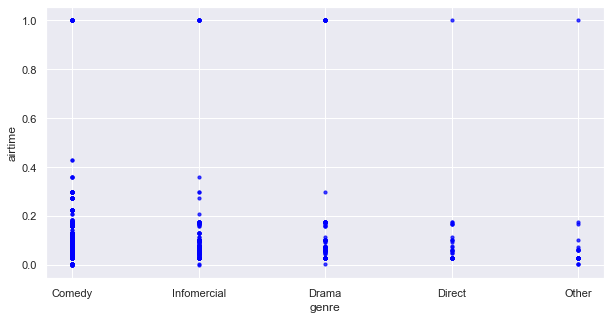

In [121]:
scatterplot(df_train.genre,df_train.ratings,x_label="genre",y_label='airtime',color='blue',yscale_log=False)

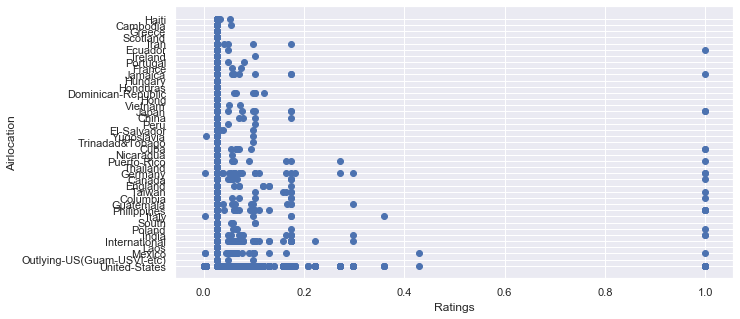

In [122]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['ratings'], y = df_train['airlocation'])
plt.ylabel('Airlocation')
plt.xlabel('Ratings')
plt.show()

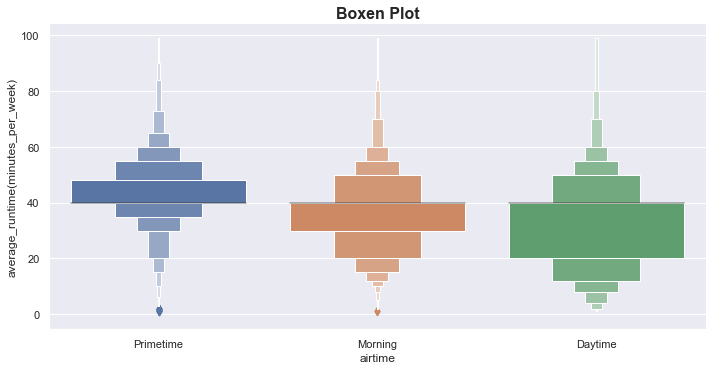

In [123]:
# Plotting
sns.catplot(x='airtime', y='average_runtime(minutes_per_week)', data=df_train, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

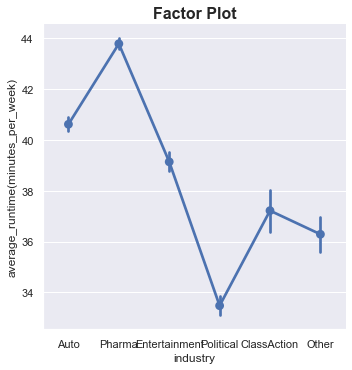

In [124]:
sns.factorplot(data=df_train,x='industry',y='average_runtime(minutes_per_week)')
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

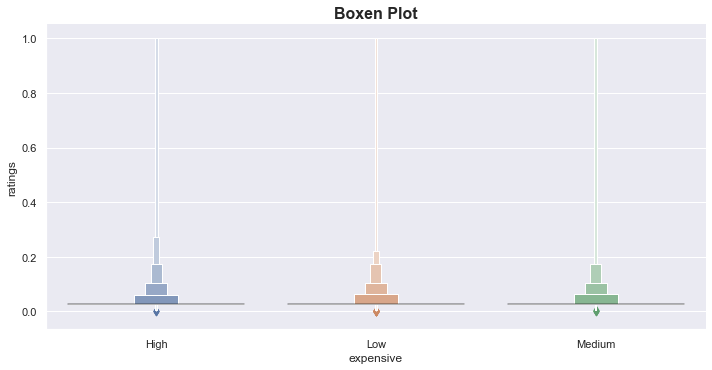

In [125]:
# Plotting
sns.catplot(x='expensive', y='ratings', data=df_train, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

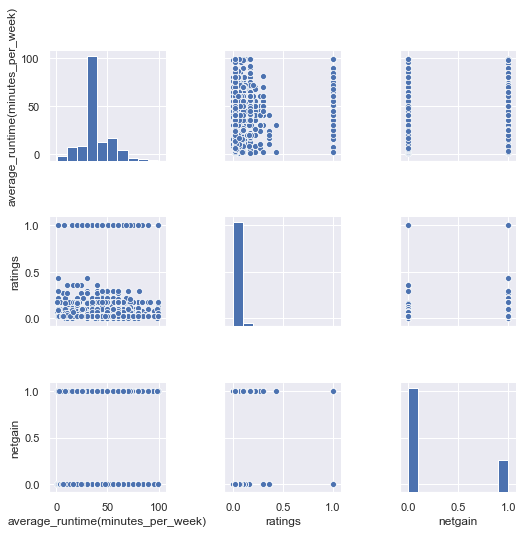

In [126]:
sns.set()
cols = ['realtionship_status','industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee','netgain']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

# One_hot Encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms 
to do a better job in prediction.
The encoding is done using pandas.get_dummies

In [127]:
encoded = pd.get_dummies(df_train)

In [128]:
encoded.head()

,id,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,19717,45,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,31593,45,0.027465,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,5681,45,0.027465,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,15491,40,0.027465,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,23587,48,0.027465,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [129]:
encoded.columns

Index(['id', 'average_runtime(minutes_per_week)', 'ratings', 'netgain',
       'realtionship_status_Divorced', 'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_Auto', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Comedy', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'targeted_sex_Female',
       'targeted_sex_Male', 'airtime_Daytime', 'airtime_Morning',
       'airtime_Primetime', 'airlocation_Cambodia', 'airlocation_Canada',
       'airlocation_China', 'airlocation_Columbia', 'airlocation_Cuba',
       'airlocation_Dominican-Republic', 'airlocation_Ecuador',
       'airlocation_El-Salvador', 'airlocation_England', 'airlocation_France',
       'airlocation_Germ

In [130]:
dependent_all=encoded['netgain']

In [131]:
independent_all=encoded.drop(['id','netgain'],axis=1)

## Train And Test Split 

In [132]:
x_train,x_test,y_train,y_test=train_test_split(independent_all,dependent_all,test_size=0.3,random_state=100)

# LogisticRegression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"),

In [200]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.8040258885476086


# confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_prediction)

array([[13011,   838],
       [ 2735,  1648]], dtype=int64)

# AUC 
Compute Area Under the Curve (AUC) using the trapezoidal rule

In [203]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.6577441953331035


# average precision recall score
Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>AP</mtext>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>n</mi>
  </munder>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>R</mi>
    <mi>n</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>R</mi>
    <mrow>
      <mi>n</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <msub>
    <mi>P</mi>
    <mi>n</mi>
  </msub>
</math>

where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>P</mi>
    <mi>n</mi>
  </msub>
</math> and  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>R</mi>
    <mi>n</mi>
  </msub>
</math> are the precision and recall at the nth threshold. A pair  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <msub>
    <mi>R</mi>
    <mi>k</mi>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>P</mi>
    <mi>k</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>   is referred to as an operating point.


In [204]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


# recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [206]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_train, log_prediction))

recall_score on train set : 0.3759981747661419


   # F1 Score
Compute the F1 score, also known as balanced F-score or F-measure

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [207]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_train, log_prediction))

F1_sccore on train set : 0.4798369486096957


In [208]:
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.8033017660609163


In [209]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_prediction)

array([[5629,  373],
       [1164,  648]], dtype=int64)

In [210]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on test using Logistic Regression : 0.6477349713450925


In [211]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.38


In [212]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_test, log_prediction))

recall_score on train set : 0.3576158940397351


In [213]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_test, log_prediction))

F1_sccore on train set : 0.45746558418637484


In [215]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80866228 0.80263158 0.80866228 0.79210093 0.80142622 0.78880965
 0.80691168 0.8047175  0.80362041 0.80406147]
Mean: 0.802160400731243
Standard Deviation: 0.006321426810469989



<h3 >comparing metries [Logistic Regression ]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.80402</td> <td>0.80330</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.6577</td> <td>0.6477</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.40</td> <td>0.38</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.3759</td> <td>0.35761
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.4798</td> <td>0.4546</td></tr></table>

# XGBoost Algorithm

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [240]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [241]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [242]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.82141290039491


In [243]:
confusion_matrix(y_train, XGB_prediction)

array([[12970,   879],
       [ 2377,  2006]], dtype=int64)

In [244]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBoost :",metrics.auc(fpr, tpr))

AUC on train using XGBoost : 0.6971035516261429


In [245]:
average_precision = average_precision_score(y_train, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.45


In [246]:
print('recall_score on train set :',recall_score(y_train, XGB_prediction))

recall_score on train set : 0.45767738991558293


In [247]:
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))

F1_sccore on train set : 0.5520088057237204


In [248]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.8207064243665216


In [249]:
confusion_matrix(y_test, XGB_prediction)

array([[5623,  379],
       [1022,  790]], dtype=int64)

In [270]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBoost :",metrics.auc(fpr, tpr))

AUC on test using XGBoost : 0.6864183609142794


In [271]:
average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.43


In [272]:
print('recall_score on test set :',recall_score(y_test, XGB_prediction))

recall_score on test set : 0.4359823399558499


In [273]:
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))

F1_sccore on test set : 0.5300234820530024


In [254]:
xg = xgb.XGBClassifier()
scores = cross_val_score(xg, x_test, y_test, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80715198 0.81864623 0.82330346 0.80409731 0.81818182 0.81049936
 0.80025608 0.82714469 0.80793854 0.815621  ]
Mean: 0.8132840465526237
Standard Deviation: 0.00823871108750256



<h3 >comparing metries [XGBoost]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.82141</td> <td>0.82070</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.69710</td> <td>0.686418</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.45</td> <td>0.43</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.45767</td> <td>0.43598
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.55200</td> <td>0.53002</td></tr></table>

# RandomForestClassifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [261]:
rfc2=RandomForestClassifier(n_estimators=300)
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [264]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.8630978499341817


In [265]:
confusion_matrix(y_train, rfc_prediction)

array([[13158,   691],
       [ 1805,  2578]], dtype=int64)

In [266]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

AUC on train using RandomForest : 0.7691431557346456


In [267]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.56


In [268]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

recall_score on train set : 0.5881816107688798


In [269]:
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))

F1_sccore on train set : 0.6738107684265552


In [274]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.8075249552085999


In [275]:
confusion_matrix(y_test, rfc_prediction)

array([[5526,  476],
       [1028,  784]], dtype=int64)

In [279]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

AUC on test using RandomForest : 0.6766820919884688


In [280]:
average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


In [281]:
print('recall_score on test set :',recall_score(y_test, rfc_prediction))

recall_score on test set : 0.4326710816777042


In [282]:
print('F1_sccore on train set :',f1_score(y_test, rfc_prediction))

F1_sccore on train set : 0.5104166666666666


In [263]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80372807 0.80811404 0.81085526 0.80197477 0.8118486  0.79703785
 0.79703785 0.80197477 0.80526604 0.79967069]
Mean: 0.8037507939288606
Standard Deviation: 0.005004651450755969



<h3 >comparing metries [RandomForest]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.863097</td> <td>0.80752</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.76914</td> <td>0.676682</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.56</td> <td>0.40</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.58818</td> <td>0.43267
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.673810</td> <td>0.51041</td></tr></table>

# DecisionTreeClassifer

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [288]:
dec=DecisionTreeClassifier()

In [289]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [290]:
#model on train using all the independent values in df
dec_prediction = dec.predict(x_train)
dec_score= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score)

Accuracy score on train using Decision Tree : 0.8630978499341817


In [291]:
    print(confusion_matrix(y_train, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, dec_prediction))
    print('F1_sccore on train set :',f1_score(y_train, dec_prediction))
    

[[13223   626]
 [ 1870  2513]]
AUC on train using DecisionTree : 0.7640748830229742
Average precision-recall score: 0.56
recall_score on train set : 0.5733515856719142
F1_sccore on train set : 0.6681733581494284


In [292]:
#model on test using all the independent values in df
dec_prediction = dec.predict(x_test)
dec_score= accuracy_score(y_test,dec_prediction)
print('Accuracy Score on tree using Decision Tree  :',dec_score)

Accuracy Score on tree using Decision Tree  : 0.7977988226260558


In [343]:
    print(confusion_matrix(y_test, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_sccore on test set :',f1_score(y_test, dec_prediction))
    

[[5458  544]
 [1036  776]]
AUC on train using DecisionTree : 0.6688098080625073
Average precision-recall score: 0.38
recall_score on test set : 0.4282560706401766
F1_sccore on test set : 0.49553001277139214


In [296]:
lr = DecisionTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79714912 0.80482456 0.80537281 0.80032913 0.80362041 0.79045529
 0.79539221 0.79923204 0.80800878 0.79143798]
Mean: 0.7995822321167863
Standard Deviation: 0.005675499235069473



<h3 >comparing metries [DecisionTree]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.863097</td> <td>0.79779</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.76407</td> <td>0.66880</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.56</td> <td>0.38</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.573351</td> <td>0.428256
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.668173</td> <td>0.49553</td></tr></table>

# ExtraTreeClassifier

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

In [312]:
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [313]:
#model on train using all the independent values in df
etc_prediction = etc.predict(x_train)
etc_score= accuracy_score(y_train,etc_prediction)
etc_score

0.8630978499341817

In [314]:
    print(confusion_matrix(y_train, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, etc_prediction))
    print('F1_sccore on train set :',f1_score(y_train, etc_prediction))
    

[[13223   626]
 [ 1870  2513]]
AUC on train using ExtraTree : 0.7640748830229742
Average precision-recall score: 0.56
recall_score on train set : 0.5733515856719142
F1_sccore on train set : 0.6681733581494284


In [315]:
#model on test using all the independent values in df
etc_prediction = etc.predict(x_test)
etc_score= accuracy_score(y_test,etc_prediction)
etc_score

0.7922958791911953

In [342]:
    print(confusion_matrix(y_test, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_sccore on test set :',f1_score(y_test, etc_prediction))
    

[[5455  547]
 [1076  736]]
AUC on train using ExtraTree : 0.6575223637742534
Average precision-recall score: 0.37
recall_score on test set : 0.4282560706401766
F1_sccore on test set : 0.47560581583198713


In [317]:
lr = ExtraTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79385965 0.79934211 0.79605263 0.79100384 0.79594076 0.78606692
 0.78442128 0.79374657 0.80307186 0.78155873]
Mean: 0.7925064346868189
Standard Deviation: 0.0064423667356327905



<h3 >comparing metries [ExtraTree]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.863097</td> <td>0.794983</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.764074</td> <td>0.6592717</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.56</td> <td>0.37</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.573351</td> <td>0.428256
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.668173</td> <td>0.478854</td></tr></table>

# AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [338]:
ada =AdaBoostClassifier(n_estimators=100)

In [339]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [340]:
#model on train using all the independent values in df
ada_prediction = ada.predict(x_train)
ada_score= accuracy_score(y_train,ada_prediction)
ada_score

0.8186156208863536

In [341]:
    print(confusion_matrix(y_train, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,ada_prediction)
    print("AUC on train using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, ada_prediction))
    print('F1_sccore on train set :',f1_score(y_train, ada_prediction))
    

[[12703  1146]
 [ 2161  2222]]
AUC on train using AdaBoost : 0.7121045235345069
Average precision-recall score: 0.45
recall_score on train set : 0.5069587040839607
F1_sccore on train set : 0.5733453747903497


In [318]:
#model on test using all the independent values in df
ada_prediction = ada.predict(x_test)
ada_score= accuracy_score(y_test,ada_prediction)
print('accuracy score om test using AdaBoost :',ada_score)

accuracy score om test using AdaBoost : 0.8162272843614026


In [337]:
    print(confusion_matrix(y_test, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,ada_prediction)
    print("AUC on test using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, ada_prediction))
    print('F1_sccore on test set :',f1_score(y_test, ada_prediction))
    

[[5498  504]
 [ 932  880]]
AUC on test using AdaBoost : 0.7008396023989061
Average precision-recall score: 0.43
recall_score on test set : 0.4856512141280353
F1_sccore on test set : 0.5506883604505631


In [320]:
lr = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82236842 0.81469298 0.81578947 0.81294569 0.82940208 0.80416895
 0.8118486  0.81130005 0.82117389 0.81668496]
Mean: 0.8160375114692477
Standard Deviation: 0.00661646109397705



<h3 >comparing metries [AdaBoost]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.818615</td> <td>0.816227</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.712104</td> <td>0.7008396</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.45</td> <td>0.43</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.5069587</td> <td>0.485651
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.573345</td> <td>0.55068</td></tr></table>

# BaggingClassifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [334]:
bca =BaggingClassifier()
bca.fit(x_train,y_train)
#model on train using all the independent values in df
bca_prediction = bca.predict(x_train)
bca_score= accuracy_score(y_train,bca_prediction)
print('accuracy on train using BaggingClassifier :',bca_score)

accuracy on train using BaggingClassifier : 0.8588745063624397


In [335]:
    print(confusion_matrix(y_train, bca_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,bca_prediction)
    print("AUC on train using BaggingClassifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, bca_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, bca_prediction))
    print('F1_sccore on train set :',f1_score(y_train, bca_prediction))
    

[[13094   755]
 [ 1818  2565]]
AUC on train using BaggingClassifier : 0.7653495170779349
Average precision-recall score: 0.55
recall_score on train set : 0.5852156057494866
F1_sccore on train set : 0.6659742957289368


In [323]:
#model on test using all the independent values in df
bca_prediction = bca.predict(x_test)
bca_score= accuracy_score(y_test,bca_prediction)
print(bca_score)

0.8061172254927054


In [332]:
    print(confusion_matrix(y_test, bca_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,bca_prediction)
    print("AUC on train using Bagging Classifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, bca_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, bca_prediction))
    print('F1_sccore on test set :',f1_score(y_test, bca_prediction))
    

[[5469  533]
 [ 982  830]]
AUC on train using Bagging Classifier : 0.6846268315270921
Average precision-recall score: 0.40
recall_score on test set : 0.45805739514348787
F1_sccore on test set : 0.5228346456692913


In [325]:
lr = BaggingClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80592105 0.80427632 0.81195175 0.80307186 0.81459133 0.79594076
 0.79813494 0.80581459 0.81239715 0.79582876]
Mean: 0.8047928513240151
Standard Deviation: 0.006431742647120898


<h3 >comparing metries [Bagging Classifier]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.859258</td> <td>0.806117</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.76973</td> <td>0.68462</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.55</td> <td>0.40</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.59730</td> <td>0.45805
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.677110</td> <td>0.52283</td></tr></table>

# ExtraTreesClassifier

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [326]:
ettc=ExtraTreesClassifier()
ettc.fit(x_train,y_train)
#model on train using all the independent values in df
ettc_prediction = ettc.predict(x_train)
ettc_score= accuracy_score(y_train,ettc_prediction)
print('training accuracy using Extratressclassifier',ettc_score)

training accuracy using Extratressclassifier 0.8630978499341817


In [327]:
    print(confusion_matrix(y_train, ettc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,ettc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, ettc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, ettc_prediction))
    print('F1_sccore on train set :',f1_score(y_train, ettc_prediction))
    

[[13223   626]
 [ 1870  2513]]
AUC on train using ExtraTree : 0.7640748830229742
Average precision-recall score: 0.56
recall_score on train set : 0.5733515856719142
F1_sccore on train set : 0.6681733581494284


In [328]:
#model on test using all the independent values in df
ettc_prediction =ettc.predict(x_test)
ettc_score= accuracy_score(y_test,ettc_prediction)
print('testing accuracy using Extratressclassifier',ettc_score)

testing accuracy using Extratressclassifier 0.8012541592014333


In [331]:
    print(confusion_matrix(y_test, ettc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,ettc_prediction)
    print("AUC on test using Extratreesclassifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, ettc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, ettc_prediction))
    print('F1_sccore on test set :',f1_score(y_test, ettc_prediction))
    

[[5526  476]
 [1077  735]]
AUC on test using Extratreesclassifier : 0.6631611206860406
Average precision-recall score: 0.38
recall_score on test set : 0.4056291390728477
F1_sccore on test set : 0.48627191531591135


<h3 >comparing metries [ExtraTreesClassifier]</h3>
<table style="width:50%"> <thead> <tr> <th>Metries </th> <th> Train</th> <th> Test</th></tr> </thead> <tbody> <tr> <th scope='row'> Accuracy Score </th> <td>0.863097</td> <td>0.801254</td></tr> 
    <tr><th scope='row'>AUC </th> <td>0.764074</td> <td>0.663161</td></tr><tr> <th scope='row'>Average_precision_recall_score</th> <td>0.56</td> <td>0.38</td></tr> <tr> 
    <th scope='row'>recall_score </th> <td>0.573351</td> <td>0.405629
    </td></tr> <tr><th scope='row'>F1 Score </th> <td>0.6681733</td> <td>0.486271</td></tr></table>

# GridSearchCV [RandomForestClassifier]

In [345]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto','sqrt','log2'],'max_depth':[None, 10, 5, 3, 1],
              'min_samples_leaf':[1, 5, 10, 20, 50]}
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=10, scoring='accuracy')
grid_clf.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [346]:
grid_clf.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5}

In [347]:
clf = RandomForestClassifier().fit(x_train, y_train)

In [348]:
y_pred = clf.predict(x_test)

In [351]:
print('Training Accuracy :: ', accuracy_score(y_train, clf.predict(x_train)))
print('Test Accuracy :: ', accuracy_score(y_test, y_pred))

Training Accuracy ::  0.8586551118911804
Test Accuracy ::  0.803813667775787


# Neural Network(MLPclassifier)

In [353]:
nn=MLPClassifier()
nn.fit(x_train,y_train)
nn_prediction = nn.predict(x_train)
nn_score= accuracy_score(y_train,nn_prediction)
print('accuracy score on train using MLPClassifier :',nn_score)
#model on test using all the independent values in df
nn_prediction =nn.predict(x_test)
nn_score= accuracy_score(y_test,nn_prediction)
print('accuracy score on test using MLPClassifier :',nn_score)

accuracy score on train using MLPClassifier : 0.8205901711276876
accuracy score on test using MLPClassifier : 0.8077809060660354


## feature Enginearing on test data 

In [75]:
df_test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [76]:
encoded = pd.get_dummies(df_test)

In [77]:
encoded

,id,average_runtime(minutes_per_week),ratings,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,...,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,1,10,0.027465,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,4,40,0.056262,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,5,50,0.027465,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,9,40,0.027465,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,10,40,0.027465,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,32538,40,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6509,32542,80,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
6510,32549,40,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6511,32558,40,0.027465,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [78]:
testing=encoded.drop(['id'],axis=1)

<h3 style='padding: 10px'>comparison table</h2><table border-style:solid; class='table table-striped'> <thead> <tr> <th>Algorithm Used</th> <th>Accuracy Score On Train</th> <th>Accuracy Score On Test</th></tr> </thead> <tbody> <tr> <th scope='row'>XGBoost Classifier </th> <td>0.82141290039491</td> <td>0.8207064243665216</td></tr> 
    <tr> <th scope='row'>Random Forest Classifier</th> <td>0.8588196577446249</td> <td>0.8050934220629639</td></tr> <tr> 
    <th scope='row'>Logisitic Regresion</th> <td>0.8040258885476086</td> <td>0.8033017660609163
    </td></tr> <tr><th scope='row'>Decision Tree Classifier</th> <td>0.8630978499341817</td> <td>0.7999744049142564</td></tr>
    <tr><th scope='row'>Extra tree classifier</th><td>0.8630978499341817</td><td>0.8001023803429741</td></tr>
    <tr><th scope='row'>ADA boost classifier</th><td>0.8180122860903906</td><td>0.8162272843614026</td></tr>
    <tr><th scope='row'>Bagging classifier</th><td>0.8593132953049584</td><td>0.8052213974916816</td></tr>
    <tr><th scope='row'>ExtraTreesclassifier</th><td>0.8630978499341817</td><td>0.8004863066291272</td></tr>
    <tr><th scope='row'>GridSearchCV(randomforest)</th><td>0.8586551118911804</td><td>0.8022779626311748</td></tr>
        <tr><th scope='row'>NeuralNetwork(MLPClassifier)</th><td>0.8099495392716104</td><td>0.8033017660609163</td></tr>
    </tbody> </table>

#  Best Algorithm

From the above table we get to known that XGBoost algorithm gives us the best accuracy score and produces less delta value 

XGBoost model is to Predict the targeted variable on the test variable 

In [79]:
prediction = xgboost.predict(testing)

In [80]:
submission=pd.DataFrame({"id":df_test.id,'prediction': prediction})

In [81]:
# saving the dataframe 
submission.to_csv('sample_submission.csv')

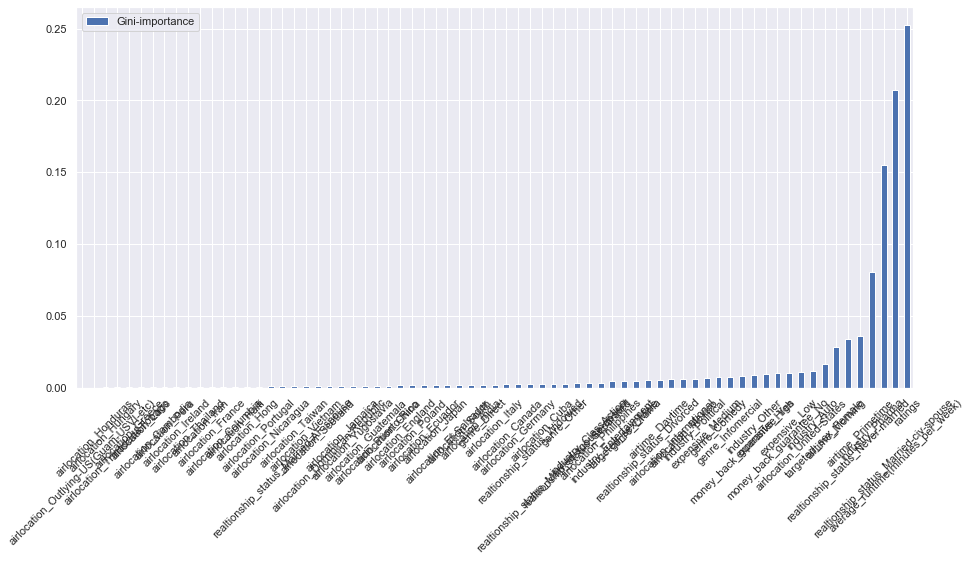

In [82]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfc2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#plt.figure(figsize=(15,7))
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(15,7))

Feature ranking:
1. feature 1 (0.252380)
2. feature 0 (0.207417)
3. feature 4 (0.154750)
4. feature 13 (0.080305)
5. feature 24 (0.035702)
6. feature 6 (0.033575)
7. feature 23 (0.028009)
8. feature 20 (0.016788)
9. feature 9 (0.011313)
10. feature 63 (0.010974)
11. feature 67 (0.010213)
12. feature 69 (0.010026)
13. feature 66 (0.009355)
14. feature 12 (0.009037)
15. feature 70 (0.007849)
16. feature 18 (0.007641)
17. feature 15 (0.007070)
18. feature 68 (0.006883)
19. feature 14 (0.006246)
20. feature 50 (0.006193)
21. feature 43 (0.005817)
22. feature 22 (0.005051)
23. feature 2 (0.005043)
24. feature 17 (0.004956)
25. feature 21 (0.004836)
26. feature 11 (0.004527)
27. feature 54 (0.003259)
28. feature 10 (0.003060)
29. feature 7 (0.003005)
30. feature 19 (0.002697)
31. feature 5 (0.002630)
32. feature 29 (0.002529)
33. feature 8 (0.002394)
34. feature 35 (0.002324)
35. feature 26 (0.002295)
36. feature 46 (0.001911)
37. feature 16 (0.001843)
38. feature 42 (0.001819)
39. feature 5

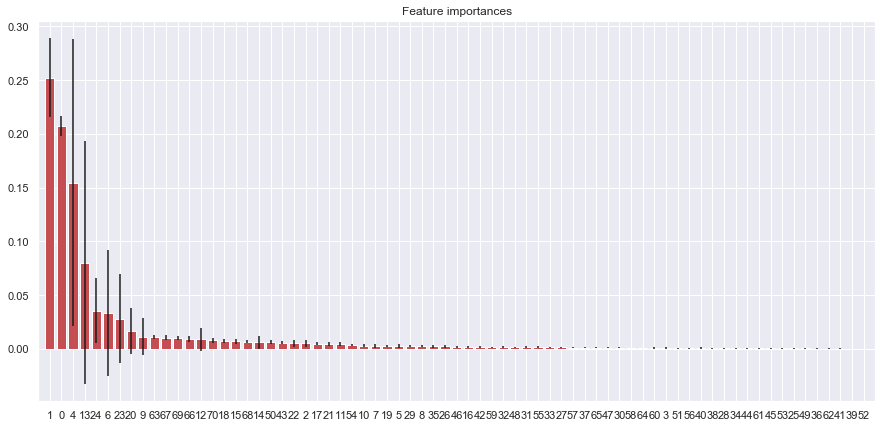

In [83]:
importances = rfc2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
#plt.figure()
plt.figure(figsize=(15,7))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
